In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import importlib
import functions
#import seaborn as sns

importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Lenovo\\Documents\\Études\\Ecole_Ingénieur\\2A\\TR-Economie\\Projet_de_recherche\\analysingEffectOfHealthPlanInFrance\\code\\functions.py'>

# Collecting code LPP under the "100% Santé" plan

### Verification of L_SC1 titles who has been modified, erased or added between 2014 and 2024

#### First solution

In [2]:
diff = {}

for i in range(2024-2015):
    df1 = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{i+2014}.CSV", encoding='ISO-8859-1', sep=';')
    produits1 = df1["L_SC1"].unique().tolist()
    df2 = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{i+2014+1}.CSV", encoding='ISO-8859-1', sep=';')
    produits2 = df2["L_SC1"].unique().tolist()
    difference = list(set(produits1).difference(set(produits2)))
    key = f"{i+2014} - {i+2015}"
    diff[key] = difference

diff

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

#### Or you could get a list of the different L_SC1 through the years, useable whenever you want

In [3]:
def finding_unique_LPP():
    unique_values=[]
    elements = os.listdir("../Open-LPP-data/base_complete")
    for i in range(int(len(elements)/2)):
        df = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{(i+2014)}.CSV", encoding='ISO-8859-1', sep=';')
        values = df["L_SC1"].unique().tolist()
        for value in values:
            if value in unique_values:
                pass
            else:
                unique_values.append(value)

    return unique_values

## Optical

### Getting the interesting L_SC1 titles

*avant tout il faut regarder si on prend bien tout les l_SC1 en compte parce qu'il y a eu des ajouts, suppressions et modif toutes ces années*

In [4]:
produits = finding_unique_LPP()

In [5]:
produits

['DM, MATERIELS ET PRODUITS POUR LE TRAITEMENT DE PATHOLOGIES SPECIFIQUES',
 'DM DE MAINTIEN A DOMICILE ET D AIDE A LA VIE POUR MALADES ET HANDICAPE',
 'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
 'ACCESSOIRES DE PRODUITS INSCRITS AU TITRE III',
 'CODES ARRIVES A ECHEANCE',
 'ORTHESES',
 'OPTIQUE MEDICALE',
 'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR',
 'PROTHESES EXTERNES NON ORTHOPEDIQUES',
 'PROTHESES OCULAIRES ET FACIALES',
 'PODO-ORTHESES',
 'DMI D ORIGINE SYNTHETIQUE',
 'DMI ISSUS DE DERIVES ORIGINE ANIMALE NON VIABLES OU EN COMPORTANT',
 'IMPLANTS ISSUS DE DERIVES HUMAINS-GREFFONS',
 'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS',
 'FAUTEUILS ROULANTS',
 'VEHICULES DIVERS',
 'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
 'APPAREIL GENERATEUR D AEROSOL',
 'ORTHESES (PETIT APPAREILLAGE) (CHAP.1)',
 'ORTHOPROTHESES(CHAP.7)',
 'DISPOSITIFS MEDICAUX UTILISES DANS LE SYST CARDIO-VASCULAIRE',
 'DISPOSITIFS MEDICAUX UTILISES

In [6]:
optical_100 = []
produits_index = [6, 9]

for i in range(len(produits_index)):
    optical_100.append(produits[produits_index[i]])

print(optical_100) #we got 2 interesting L_SC1 title which seem to be eligible to the 100% Santé plan for optical field, we will clean it more precisely.

['OPTIQUE MEDICALE', 'PROTHESES OCULAIRES ET FACIALES']


### Trying to clean the part "PROTHESES OCULAIRES ET FACIALES"

In [7]:
df2023cplt = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_2023.CSV", encoding='ISO-8859-1', sep=';')

In [8]:
print(len(df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"]))
df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"].tail(3)
#we can notice that there are some shipping fees, we will look if we can disregard those.

943


,TITRE,L_TITRE,SC1,L_SC1,SC2,L_SC2,CODE_LPP,L_CODE_LPP,AGE,SEXE,BEN_REG,PSP_SPE,QTE,REM,BSE
729418,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_3,FRAIS D EXPEDITION ET FRAIS ACCESSOIRES,2593607,"PROTHESES OCULAIRES ET FACIALES, FRAIS D EXPED...",60,2,76,15,74,1710.00,1710.00
729419,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_3,FRAIS D EXPEDITION ET FRAIS ACCESSOIRES,2593607,"PROTHESES OCULAIRES ET FACIALES, FRAIS D EXPED...",60,2,76,90,22,718.00,718.00
729420,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_3,FRAIS D EXPEDITION ET FRAIS ACCESSOIRES,2593607,"PROTHESES OCULAIRES ET FACIALES, FRAIS D EXPED...",60,2,93,15,23,483.19,483.19


In [9]:
df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"]["L_SC2"].unique()

array(['PROTHESES OCULAIRES', 'PROTHESES FACIALES',
       'FRAIS D EXPEDITION ET FRAIS ACCESSOIRES'], dtype=object)

In [10]:
print(len(df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"][df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS")]))

916


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10364\235692083.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"][df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS")]))


In [11]:
df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"][df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS")]["L_CODE_LPP"].unique() 
#we figure out that this is not as precise as we would want, but we will keep all that points for the optical field (where L_SC1 = PROTHESES OCULAIRE ET FACIALES)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10364\202664890.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"][df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS")]["L_CODE_LPP"].unique()


array(['PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT SUR MESURE',
       'PROTHESE OCULAIRE PROVISOIRE SUR GABARIT',
       "PROTHESE OCULAIRE DEFINITIVE DE RECOUVREMENT AVEC PRISE D'EMPREINTE",
       "PROTHESE OCULAIRE PROVISOIRE AVEC PRISE D'EMPREINTE",
       'PROTHESE OCULAIRE, RENOUVELLEMENT AVEC REPRISE DU CONTRE-TYPE INITIAL',
       'PROTHESE OCULAIRE ORGANIQUE, REPOLISSAGE',
       'PROTHESE OCULAIRE RECOUVRT, RENOUVT SANS PRISE EMPREINTE, +REPRISE MAITRE-MODELE',
       'PROTHESE OCULAIRE PROVISOIRE, TEST DE RECOUVREMENT, TEST DE TOLERANCE',
       "PROTHESE OCULAIRE, RENOUVELLEMENT AVEC PRISE D'EMPREINTE COMPLEMENTAIRE",
       'PROTHESE OCULAIRE PALPEBRO-ORBITAIRE, SUR DEVIS',
       "PROTHESE OCULAIRE DEFINITIVE AVEC PRISE D'EMPREINTE",
       'VERRE SCLERAL PERMEABLE OXYGENE, LAO, SPOT, RENOUVELLEMENT',
       "PROTHESE OCULAIRE, RENOUVELLEMENT AVEC PRISE D'EMPREINTE",
       'VERRE SCLERAL PERMEABLE OXYGENE, LAO, SPOT, PREMIERE MISE',
       "PROTHESE OCULAIRE DE RECOUV

In [12]:
final_mask = (df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES") & (df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS"))
print(len(df2023cplt[final_mask])) #we get back with 742 lines as expected with the 2nd cell above.

916


In [13]:
df_optical_2023 = df2023cplt[final_mask]
df_optical_2023.head()

,TITRE,L_TITRE,SC1,L_SC1,SC2,L_SC2,CODE_LPP,L_CODE_LPP,AGE,SEXE,BEN_REG,PSP_SPE,QTE,REM,BSE
728478,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,1,11,90,17,7905.75,8959.85
728479,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,1,84,90,35,17919.70,18446.75
728480,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,1,99,15,24,12649.20,12649.20
728481,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,1,99,90,23,11700.51,12941.65
728482,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,2,99,15,13,6851.65,6851.65


### Cleaning the dataframe of optical financement in 2014, to get the amounts of money

In [14]:
#we keep the column "REM" to calculate the financing because this is the money effectively gave by the "Sécurité Sociale"
df_optical_2023 = pd.DataFrame({
    "L_SC2" : df_optical_2023["L_SC2"],
    "CODE_LPP" : df_optical_2023["CODE_LPP"],
    "Quantity" : df_optical_2023["QTE"],
    "Financing" : df_optical_2023["REM"]
 })

In [15]:
df_optical_2023.reset_index(inplace=True)
df_optical_2023.drop(columns="index", inplace=True)
df_optical_2023.head()

,L_SC2,CODE_LPP,Quantity,Financing
0,PROTHESES OCULAIRES,2503780,17,7905.75
1,PROTHESES OCULAIRES,2503780,35,17919.70
2,PROTHESES OCULAIRES,2503780,24,12649.20
3,PROTHESES OCULAIRES,2503780,23,11700.51
4,PROTHESES OCULAIRES,2503780,13,6851.65


In [16]:
df_optical_2023["Total"] = df_optical_2023['Quantity']*df_optical_2023["Financing"]
df_optical_2023.head(5)

,L_SC2,CODE_LPP,Quantity,Financing,Total
0,PROTHESES OCULAIRES,2503780,17,7905.75,134397.75
1,PROTHESES OCULAIRES,2503780,35,17919.70,627189.50
2,PROTHESES OCULAIRES,2503780,24,12649.20,303580.80
3,PROTHESES OCULAIRES,2503780,23,11700.51,269111.73
4,PROTHESES OCULAIRES,2503780,13,6851.65,89071.45


In [17]:
sum = df_optical_2023["Total"].sum()
sum

927978230.53

### Ajusting the result to the inflation (September 2024)

In [18]:
optical_HICP = pd.read_csv("../data/HICP/HICP-Corrective-eye-glasses-and-contact-lenses-France-Annual-parts-per-1000.csv")
#optical_HICP = optical_HICP[optical_HICP["TIME PERIOD"]>=2014]
optical_HICP.head()

,DATE,TIME PERIOD,HICP - Corrective eye-glasses and contact lenses (ICP.A.FR.N.061310.4.INW)
0,1996-12-31,1996,0.0
1,1997-12-31,1997,0.0
2,1998-12-31,1998,0.0
3,1999-12-31,1999,0.0
4,2000-12-31,2000,0.0


In [19]:
def adjusted_price(df, initial_price, year_initial_price):
    df = df[df["TIME PERIOD"]>=year_initial_price]
    for i in range(len(df)):
        initial_price = initial_price*(1+(df.iloc[i, 2]/1000))
    return initial_price

In [20]:
adjusted = adjusted_price(optical_HICP, sum, 2023)

In [21]:
print(adjusted-sum)

11262493.632813692


### Automation of this processus for every year :

In [22]:
optical_expenditures = {} #{2014:300000, 2015:493000,...}

def adjusted_price(df, initial_price, year_initial_price):
    df = df[df["TIME PERIOD"]>=year_initial_price]
    for i in range(len(df)): #calculating the equivalent for the last year of the df (2024)
        initial_price = initial_price*(1+(df.iloc[i, 2]/1000))
    return initial_price

def gov_optical_exp(inflation_adjustment):
    elements = os.listdir("../Open-LPP-data/base_complete")
    for i in range(int(len(elements)/2)):
        df = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{(i+2014)}.CSV", encoding='ISO-8859-1', sep=';')
        final_mask = (df["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES") & (df["L_SC2"].str.contains("OCULAIRES|FRAIS"))
        #print(i+2014)
        df = df[final_mask]
        df = pd.DataFrame({
        "L_SC2" : df["L_SC2"],
        "CODE_LPP" : df["CODE_LPP"],
        "Quantity" : df["QTE"],
        "Financing" : df["REM"]
        })
        df.reset_index(inplace=True)
        df.drop(columns="index", inplace=True)
        df["Total"] = df['Quantity']*df["Financing"]
        sum = df["Total"].sum()
        key = str(i+2014)

        if inflation_adjustment==True:
            optical_expenditures[key]=adjusted_price(optical_HICP, sum, i+2014)
            #print("test")
        else:
            optical_expenditures[key]=sum
            
    return optical_expenditures


In [23]:
optical_expenditures_adjusted = gov_optical_exp(inflation_adjustment=True)
optical_expenditures_adjusted = copy.deepcopy(optical_expenditures_adjusted)
optical_expenditures_adjusted

{'2014': 271625239.4823752,
 '2015': 350053676.8175159,
 '2016': 472606275.0176801,
 '2017': 517245422.91221285,
 '2018': 571658023.3696367,
 '2019': 646966219.6028622,
 '2020': 647666447.3392395,
 '2021': 802013839.2139432,
 '2022': 867350838.3591918,
 '2023': 939240724.1628137}

In [24]:
optical_expenditures_non_adjusted = gov_optical_exp(inflation_adjustment=False)
optical_expenditures_non_adjusted

{'2014': 257674784.53000003,
 '2015': 332075200.08000004,
 '2016': 448333594.9,
 '2017': 493540776.92999995,
 '2018': 548612479.98,
 '2019': 624429990.09,
 '2020': 628600167.87,
 '2021': 782856285.6099999,
 '2022': 851585392.8199999,
 '2023': 927978230.53}

### Plotting our results

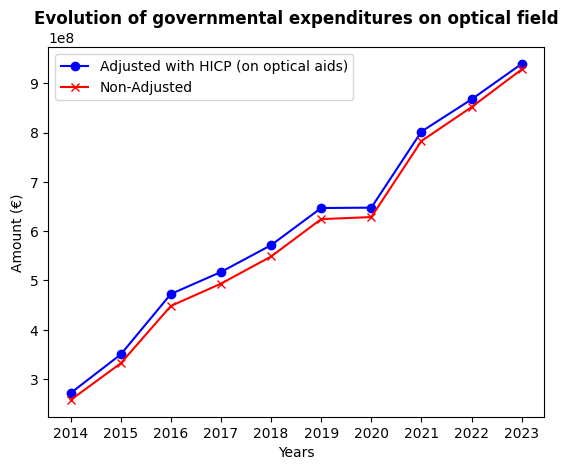

In [25]:
plt.plot(list(optical_expenditures_adjusted.keys()), list(optical_expenditures_adjusted.values()), marker="o", color="blue", label="Adjusted with HICP (on optical aids)")
plt.plot(list(optical_expenditures_non_adjusted.keys()), list(optical_expenditures_non_adjusted.values()), marker="x", color="red", label="Non-Adjusted")

plt.xlabel("Years")
plt.ylabel("Amount (€)")

plt.title("Evolution of governmental expenditures on optical field", fontweight="bold")
plt.legend()

We take aware of the fact that the trend is the same whether if we take in count the inflation rates or not.

We can deduce, in addition of the fact that the inflation don't touch a lot the health field, that the inflation is disregardable in general in the health field.

## Hearing

### Inflation adjustment

In [26]:
hearing_HICP = pd.read_csv("../data/HICP/HICP-Hearing-aids-France-Annual-parts-per-1000.csv")
hearing_HICP = hearing_HICP[hearing_HICP["TIME PERIOD"]>=2014]
hearing_HICP.head()
#clearly disregardable, because the HICP's unit is "parts per 1000", so for example, the inflation from 2015 to 2016 equals to 0,07%.
#moreover, as we can see just above this cell, the inflation rates don't have a lot of impact on health field prices

#we had foreseen that with optical field

,DATE,TIME PERIOD,HICP - Hearing aids (ICP.A.FR.N.061320.4.INW)
18,2014-12-31,2014,0.00
19,2015-12-31,2015,0.00
20,2016-12-31,2016,0.70
21,2017-12-31,2017,0.76
22,2018-12-31,2018,0.79


### Looking for the interesting fields

not so good to find the elements that fits in X field, because I can't see all of the years so the modifications, adds, ... I have to fix it

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy

In [28]:
dfH2023 = pd.read_csv("../Open-LPP-data/base_complete/OPEN_LPP_2023.CSV", encoding='ISO-8859-1', sep=';')
produits = dfH2023["L_SC1"].unique().tolist() #return a list of the L_SC1 title of all the product and prestation in the df
produits

['DM, MATERIELS ET PRODUITS POUR LE TRAITEMENT DE PATHOLOGIES SPECIFIQUES',
 'DM DE MAINTIEN A DOMICILE ET D AIDE A LA VIE POUR MALADES ET HANDICAPES',
 'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
 'CODES ARRIVES A ECHEANCE',
 'ORTHESES',
 'OPTIQUE MEDICALE',
 'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS',
 'PROTHESES EXTERNES NON ORTHOPEDIQUES',
 'PROTHESES OCULAIRES ET FACIALES',
 'PODO_ORTHESES',
 'DMI D ORIGINE SYNTHETIQUE',
 'DMI ISSUS DE DERIVES ORIGINE ANIMALE NON VIABLES OU EN COMPORTANT',
 'IMPLANTS ISSUS DE DERIVES HUMAINS_GREFFONS',
 'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS',
 'FAUTEUILS ROULANTS',
 'VEHICULES DIVERS',
 'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
 'DISPOSITIFS MEDICAUX UTILISES EN NEUROLOGIE',
 'DISPOISTIFS MEDICAUX UTILISES DANS LE SYSTEME CARDIO_VASCULAIRE',
 'DISPOSITIFS MEDICAUX UTILISES EN ONCOLOGIE',
 'DISPOSITIFS MEDICAUX UTILISES DANS LE SYSTEME GASTRO-INTESTINAL',
 'DISPOSITIFS MED

don't forget the labels that has been modified, added or erased between 2014 and 2024.

In [29]:
hearing_100 = []
produits_index = [6]

for i in range(len(produits_index)):
    hearing_100.append(produits[produits_index[i]])

print(hearing_100) #we got 2 interesting L_SC1 title which seem to be eligible to the 100% Santé plan for optical field, we will clean it more precisely.

['AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS']


In [30]:
dfH2023[dfH2023["L_SC1"]=="AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS"]["L_SC2"].unique()

array(['AUDIOPROTHESES, PATIENTS AU DELA DU 20EME ANNIVERSAIRE',
       'ALLOCATION FORFAITAIRE RELATIVE AUX PILES',
       'SYSTEME AUDITIF A CONDUCTION OSSEUSE SUR ADHESIF',
       'AUDIOPROTHESES, ENTRETIEN ET REPARATION',
       'ENTRETIEN ET REPARATIONS (PROCESSEURS IMPLANTS COCHLEAIRES ET DU TRONC CEREBRAL)',
       'PROCESSEURS,ACCES.REPARATIONS PR PROTHESES AUDIT. OSTEO-INTEGREES IMPLANTS OREIL',
       'AIDE AUDITIVE POUR LES PERSONNES AU-DELA DE LEUR 20EME ANNIVERSAIRE',
       'AIDES AUDITIVES-PERSONNES <= 20 ANS OU PERSONNES ATTEINTES DE CECITE',
       'GESTION ADMINISTRATIVE - PRESTATIONS DE SUIVI POUR UTILISATION D 1 AIDE AUDITIVE'],
      dtype=object)

All of that seems to fit in the case "Hearing"

In [31]:
dfH2023 = dfH2023[dfH2023["L_SC1"]=="AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS"]

### Cleaning data

In [32]:
#we keep the column "REM" to calculate the financing because this is the money effectively gave by the "Sécurité Sociale"
dfH2023 = pd.DataFrame({
    "L_SC2" : dfH2023["L_SC2"],
    "CODE_LPP" : dfH2023["CODE_LPP"],
    "Quantity" : dfH2023["QTE"],
    "Financing" : dfH2023["REM"]
 })

In [33]:
dfH2023.reset_index(inplace=True)
dfH2023.drop(columns="index", inplace=True)
dfH2023.head()

,L_SC2,CODE_LPP,Quantity,Financing
0,"AUDIOPROTHESES, PATIENTS AU DELA DU 20EME ANNI...",2335791,20,6524.87
1,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2317149,39,36.30
2,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2332976,66,61.20
3,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2332976,127,134.70
4,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2332976,96,56.40


In [34]:
dfH2023["Total"] = dfH2023['Quantity']*dfH2023["Financing"]
dfH2023.head(5)

,L_SC2,CODE_LPP,Quantity,Financing,Total
0,"AUDIOPROTHESES, PATIENTS AU DELA DU 20EME ANNI...",2335791,20,6524.87,130497.4
1,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2317149,39,36.30,1415.7
2,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2332976,66,61.20,4039.2
3,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2332976,127,134.70,17106.9
4,ALLOCATION FORFAITAIRE RELATIVE AUX PILES,2332976,96,56.40,5414.4


In [35]:
sum = dfH2023["Total"].sum()
sum

497231768216.13

In [36]:
def gov_hearing_exp(inflation_adjustment): #I suppose we can make a function that is able to makes the difference when I want to use it for optical or hearing or ... field, but I don't have much time at this moment, I've to look for it later..
    elements = os.listdir("../Open-LPP-data/base_complete")
    for i in range(int(len(elements)/2)):
        df = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{(i+2014)}.CSV", encoding='ISO-8859-1', sep=';')
        final_mask = (df["L_SC1"]=="AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS") | (df["L_SC1"]=="AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR")
        #print(i+2014)
        df = df[final_mask]
        df = pd.DataFrame({
        "L_SC2" : df["L_SC2"],
        "CODE_LPP" : df["CODE_LPP"],
        "Quantity" : df["QTE"],
        "Financing" : df["REM"]
        })
        df.reset_index(inplace=True)
        df.drop(columns="index", inplace=True)
        df["Total"] = df['Quantity']*df["Financing"]
        sum = df["Total"].sum()
        key = str(i+2014)

        if inflation_adjustment==True:
            optical_expenditures[key]=adjusted_price(optical_HICP, sum, i+2014)
            #print("test")
        else:
            optical_expenditures[key]=sum
            
    return optical_expenditures

In [37]:
hearing_expenditures_adjusted = gov_hearing_exp(inflation_adjustment=True)
hearing_expenditures_adjusted = copy.deepcopy(hearing_expenditures_adjusted)
hearing_expenditures_adjusted

{'2014': 1204972738253.7412,
 '2015': 1487541849576.8667,
 '2016': 1599893421373.7224,
 '2017': 1809580821081.9968,
 '2018': 2008212193960.5957,
 '2019': 924292812155.6421,
 '2020': 894773931726.1978,
 '2021': 463144180933.29926,
 '2022': 527528658898.48486,
 '2023': 503266467565.0236}

In [38]:
hearing_expenditures_non_adjusted = gov_hearing_exp(inflation_adjustment=False)
hearing_expenditures_non_adjusted

{'2014': 1143086302604.8198,
 '2015': 1411142890474.83,
 '2016': 1517724175445.0,
 '2017': 1726650222105.52,
 '2018': 1927254104754.19,
 '2019': 892096270325.9701,
 '2020': 868433197364.91,
 '2021': 452081143066.92,
 '2022': 517940008061.4601,
 '2023': 497231768216.13}

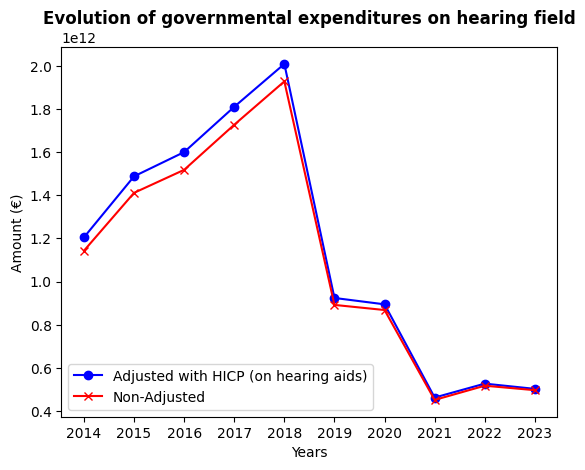

In [39]:
plt.plot(list(hearing_expenditures_adjusted.keys()), list(hearing_expenditures_adjusted.values()), marker="o", color="blue", label="Adjusted with HICP (on hearing aids)")
plt.plot(list(hearing_expenditures_non_adjusted.keys()), list(hearing_expenditures_non_adjusted.values()), marker="x", color="red", label="Non-Adjusted")

plt.xlabel("Years")
plt.ylabel("Amount (€)")

plt.title("Evolution of governmental expenditures on hearing field", fontweight="bold")
plt.legend()

Results are pretty weird .. So I'm not really confident on what I did here

## Dental

In [40]:
unique_values = finding_unique_LPP()

Dental sector isn't in LPP dataset

# Whole health field

# New analyses after cleaning precisely data

## Different tries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import importlib
import functions
#import seaborn as sns

importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Lenovo\\Documents\\Études\\Ecole_Ingénieur\\2A\\TR-Economie\\Projet_de_recherche\\analysingEffectOfHealthPlanInFrance\\code\\functions.py'>

### DiD on code_LPP under 100% Santé plan and code_LPP that isn't in it but is in the field that we are working on.

#### Optical field

In [22]:
import json

with open('../data/potential_100Santé.json', 'r') as file:
    data = json.load(file)

In [23]:
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Lenovo\\Documents\\Études\\Ecole_Ingénieur\\2A\\TR-Economie\\Projet_de_recherche\\analysingEffectOfHealthPlanInFrance\\code\\functions.py'>

In [24]:
from functions import gov_exp

In [80]:
classe_A = gov_exp(inflation_adjustment=False, sector="optical", mask={"CLASSE A":["contains", "L_CODE_LPP"]})

2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [63]:
whole_optical = gov_exp(inflation_adjustment=False, sector="optical", mask={"OPTIQUE MEDICALE":["equality", "L_SC1"]})

2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


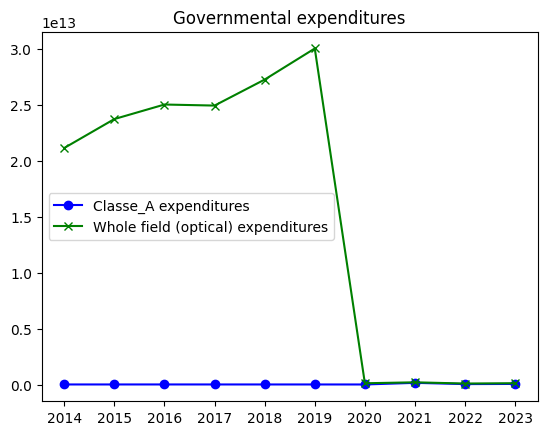

In [64]:
plt.plot(list(classe_A[0].keys()), list(classe_A[0].values()), color="blue", label="Classe_A expenditures", marker="o")
plt.plot(list(whole_optical[0].keys()), list(whole_optical[0].values()), color="green", label="Whole field (optical) expenditures", marker="x")

plt.xlabel = "Year"
plt.ylabel = "Amout (€)"

plt.legend()
plt.title(label="Governmental expenditures")
plt.show()

Need to be normalized, so we will be able to compare the trend.

In [65]:
from typing import List
import numpy as np

def normalized_by_mean(list : List[int]):
    normalized_list = []
    mean=np.mean(list)
    for int in list:
        int = int/mean
        normalized_list.append(int)

    return normalized_list

values_A = list(classe_A[0].values())
values_B = list(whole_optical[0].values())
values_A_LPP_codes = list(classe_A[1].values())
values_B_LPP_codes = list(whole_optical[1].values())

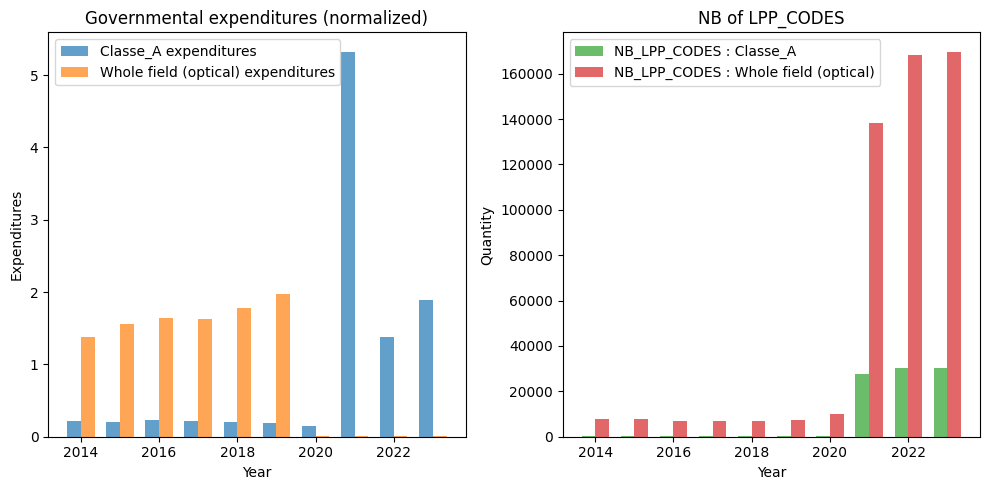

In [78]:
width = 0.35

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

years_A = np.array([int(year) for year in classe_A[0].keys()])
years_B = np.array([int(year) for year in whole_optical[0].keys()])

ax1.bar(years_A - width/2, normalized_by_mean(values_A), width=width, color="#1f77b4", label="Classe_A expenditures", alpha=0.7)
ax1.bar(years_B + width/2, normalized_by_mean(values_B), width=width, color="#ff7f0e", label="Whole field (optical) expenditures", alpha=0.7)

ax1.set_title('Governmental expenditures (normalized)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Expenditures')
ax1.legend()

years_A_LPP = np.array([int(year) for year in classe_A[1].keys()])
years_B_LPP = np.array([int(year) for year in whole_optical[1].keys()])

ax2.bar(years_A_LPP - width/2, values_A_LPP_codes, width=width, color="#2ca02c", label="NB_LPP_CODES : Classe_A", alpha=0.7)
ax2.bar(years_B_LPP + width/2, values_B_LPP_codes, width=width, color="#d62728", label="NB_LPP_CODES : Whole field (optical)", alpha=0.7)

ax2.set_title('NB of LPP_CODES')
ax2.set_xlabel('Year')
ax2.set_ylabel('Quantity')
ax2.legend()

plt.tight_layout()
plt.show()


In [67]:
df = pd.read_csv(
    f"../Open-LPP-data/base_complete/OPEN_LPP_{(2020)}.CSV",
    encoding="ISO-8859-1",
    sep=";",
)

df = pd.DataFrame(
    {
        "L_SC1": df["L_SC1"],
        "L_SC2": df["L_SC2"],
        "CODE_LPP": df["CODE_LPP"],
        "Quantity": df["QTE"],
        "Financing": df["REM"],
    }
)

### DiD on code_LPP under 100% Santé (optical) plan and all the fields in LPP database (optical, hearing)

In [75]:
importlib.reload(functions)
from functions import gov_exp
whole = gov_exp(inflation_adjustment=False, sector="all", mask={})

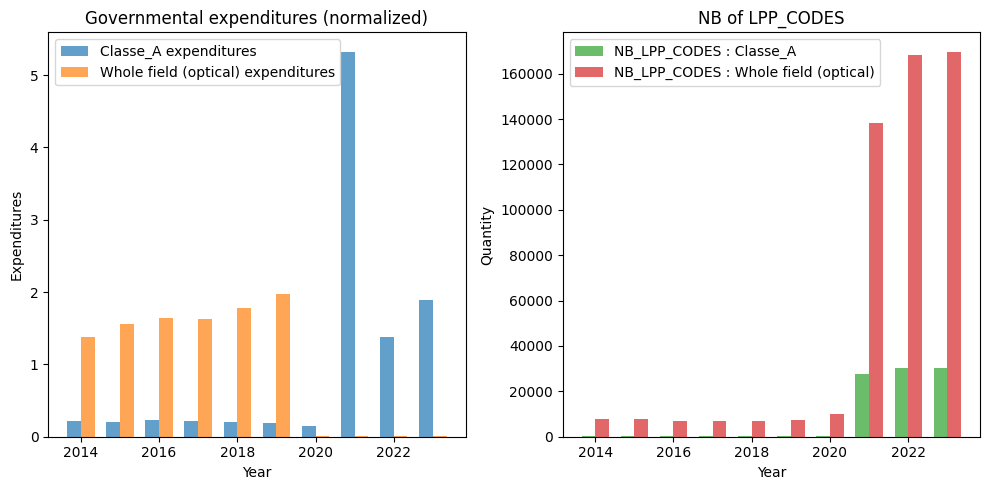

In [77]:
width = 0.35

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

years_A = np.array([int(year) for year in classe_A[0].keys()])
years_B = np.array([int(year) for year in whole[0].keys()])

ax1.bar(years_A - width/2, normalized_by_mean(values_A), width=width, color="#1f77b4", label="Classe_A expenditures", alpha=0.7)
ax1.bar(years_B + width/2, normalized_by_mean(values_B), width=width, color="#ff7f0e", label="Whole field (optical) expenditures", alpha=0.7)

ax1.set_title('Governmental expenditures (normalized)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Expenditures')
ax1.legend()

years_A_LPP = np.array([int(year) for year in classe_A[1].keys()])
years_B_LPP = np.array([int(year) for year in whole[1].keys()])

ax2.bar(years_A_LPP - width/2, values_A_LPP_codes, width=width, color="#2ca02c", label="NB_LPP_CODES : Classe_A", alpha=0.7)
ax2.bar(years_B_LPP + width/2, values_B_LPP_codes, width=width, color="#d62728", label="NB_LPP_CODES : All the fields", alpha=0.7)

ax2.set_title('NB of LPP_CODES')
ax2.set_xlabel('Year')
ax2.set_ylabel('Quantity')
ax2.legend()

plt.tight_layout()
plt.show()


normaliser ok pour voir la trend mais il faut que je refasse des graphes côte à côté pour voir vrm la quantité d'argent et comparer entre mes 2 DiD

et "+" refaire ça pour le secteur hearing dcp, après pq pas voir selon les marques ?